In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
!ls ../Data

Processed Raw


In [9]:
train_df = pd.read_csv("../Data/Raw/train_data.csv", index_col='id')
test_df = pd.read_csv("../Data/Raw/test_data.csv", index_col='id')

train_size = train_df.shape[0]
test_size = test_df.shape[0]
all_size = train_size + test_size

print("train data size : ", train_size)
print("test data size : ", test_size)
print("the ratio of train and test  ", train_size/all_size, " : ", test_size/all_size )
train_df.head()

train data size :  66125
test data size :  28340
the ratio of train and test   0.6999947070343513  :  0.30000529296564865


,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,...,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y
id,,,,,,,,,,,,,,,,,,,,,
1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,...,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0,1
2,2019-12-14T04:00:00+00:00,5.0.1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,jetsweeper,...,squiclean_b,NaN,118.0,campingshelter,NaN,168.0,sputtery_clear,NaN,151.0,0
3,2019-12-25T14:00:00+00:00,5.0.1,gachi,standard,hoko,ama,nzap89,a-,114,quadhopper_black,...,nzap85,a+,163.0,prime_becchu,a-,160.0,dualsweeper_custom,a,126.0,0
4,2019-11-11T14:00:00+00:00,5.0.1,regular,standard,nawabari,engawa,bamboo14mk1,NaN,336,splatroller_becchu,...,liter4k,NaN,189.0,promodeler_mg,NaN,194.0,hotblaster_custom,NaN,391.0,0
5,2019-12-14T06:00:00+00:00,5.0.1,gachi,standard,hoko,chozame,bold_7,x,299,hissen_hue,...,sputtery_hue,x,45.0,bucketslosher_soda,x,246.0,wakaba,x,160.0,1


## カラムの確認

In [10]:
print(train_df.columns)

Index(['period', 'game-ver', 'lobby-mode', 'lobby', 'mode', 'stage',
       'A1-weapon', 'A1-rank', 'A1-level', 'A2-weapon', 'A2-rank', 'A2-level',
       'A3-weapon', 'A3-rank', 'A3-level', 'A4-weapon', 'A4-rank', 'A4-level',
       'B1-weapon', 'B1-rank', 'B1-level', 'B2-weapon', 'B2-rank', 'B2-level',
       'B3-weapon', 'B3-rank', 'B3-level', 'B4-weapon', 'B4-rank', 'B4-level',
       'y'],
      dtype='object')


In [11]:
train_df["period"] = pd.to_datetime(train_df['period'])
test_df["period"] = pd.to_datetime(test_df['period'])

print(train_df["period"].max() == test_df["period"].max())
print(train_df["period"].min() == test_df["period"].min())

True
True


<AxesSubplot:>

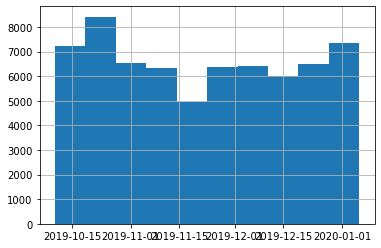

In [12]:
train_df["period"].hist()

<AxesSubplot:>

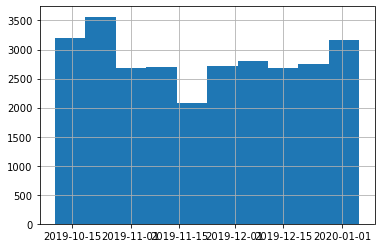

In [13]:
test_df["period"].hist()

In [20]:
train_df[train_df["lobby-mode"] == "regular"][train_df["y"] == 1]

/opt/anaconda3/envs/spla/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,...,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y
id,,,,,,,,,,,,,,,,,,,,,
1,2019-10-15 20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,...,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0,1
8,2019-12-31 06:00:00+00:00,5.0.1,regular,standard,nawabari,ama,octoshooter_replica,NaN,113,bucketslosher,...,pablo_permanent,NaN,13.0,dynamo_becchu,NaN,38.0,splatscope_becchu,NaN,32.0,1
23,2019-12-14 22:00:00+00:00,5.0.1,regular,standard,nawabari,ama,screwslosher,NaN,33,nzap85,...,bold,NaN,12.0,nzap89,NaN,14.0,carbon_deco,NaN,11.0,1
33,2019-12-12 12:00:00+00:00,5.0.1,regular,standard,nawabari,gangaze,carbon_deco,NaN,173,kelvin525,...,sshooter_becchu,NaN,97.0,dualsweeper_custom,NaN,48.0,heroroller_replica,NaN,275.0,1
45,2020-01-03 22:00:00+00:00,5.0.1,regular,standard,nawabari,gangaze,ochiba,NaN,60,momiji,...,maneuver,NaN,45.0,heromaneuver_replica,NaN,88.0,nova_neo,NaN,108.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66092,2019-10-19 14:00:00+00:00,5.0.1,regular,standard,nawabari,battera,octoshooter_replica,NaN,167,nzap89,...,hydra_custom,NaN,288.0,nova_becchu,NaN,109.0,carbon_deco,NaN,107.0,1
66100,2019-12-30 04:00:00+00:00,5.0.1,regular,standard,nawabari,mozuku,l3reelgun,NaN,62,promodeler_pg,...,explosher_custom,NaN,272.0,bamboo14mk1,NaN,143.0,prime,NaN,122.0,1
66104,2019-11-07 10:00:00+00:00,5.0.1,regular,standard,nawabari,devon,bold_7,NaN,329,liter4k,...,splatroller_becchu,NaN,20.0,splatroller_becchu,NaN,15.0,carbon,NaN,8.0,1
